In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [3]:
def f(n, x):
    return  np.sin(n*theta)

def gaussian_pulse(x, A, x_0, sigma):
    
    up = -1/2 * ((x - x_0)/ sigma)**2 
    func = A * np.exp(up)
    
    return func
    
    

In [149]:
# Define parameters
#L = 1 # Length of the string
c = 10 # Wave speed
T = 120 # Duration of the simulation
dx = 1# Spatial step size
dt = 0.05 # Temporal step size
N = 1000 # Number of spatial points
M = 200 # Number of temporal points

# Create a 2D array to store the solution
u = np.zeros((M,N))

# Set the initial condition
theta = np.linspace(0, 2*np.pi, N)


#Initial conditions, for spatial configuration and velocities.

#Initial spatial configuration.
u[0,:] = gaussian_pulse(theta, 0.1, np.pi/2, 0.1) 

u[1, :] = gaussian_pulse(theta, 0.1, np.pi/2, 0.1) 


u[0,:] = 0.01 * f(3, theta)
u[1, :] = 0.01 * f(3, theta)

# Set the boundary conditions
u[:,0] = 0
u[:,-1] = 0

# Apply the finite difference scheme

#Supra indices are time, and sub. are space.

gamma = c*dt/dx
for k in range(1, M-1):
    for n in range(1, N-1):
        u[k + 1,n] = gamma**2 * u[k, n+1] + 2*(1 - gamma**2)*u[k,n] 
        + gamma**2 * u[k, n-1] - u[k-1, n]



In [115]:
#Observaciones 6/03/2024 5:40 a.m

#No se completa ni siquiera una oscilacion, empieza la deformación y la figura converje al circulo. 
#¿Ecuación de calor, convergencia?.

#13/03/2024
#Habia errores en la ecuación, estan supuestamente corregidos pero la solución diverje.

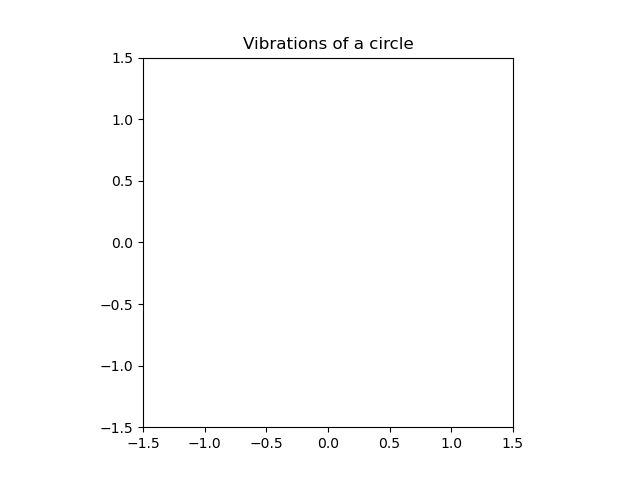

In [116]:
%matplotlib widget
fig, ax = plt.subplots()
line, = ax.plot([],[], "k")
ax.set_ylim(-L*1.5, L*1.5)
ax.set_xlim(-L*1.5, L*1.5)
#ax.set_xlabel('x')
#ax.set_ylabel('u')
ax.set_title('Vibrations of a circle')

    
# Define the animation function
def animate(m):
    k = 2 #Speed factor
    i = k*m
    e = 1/2



    if i < u.shape[0]:
        line.set_xdata((1 + e*u[i, :])*np.cos(theta))
        line.set_ydata((1 + e*u[i, :])*np.sin(theta))

    return line,

# Create and save the animation
plt.axis("scaled")
ani = animation.FuncAnimation(fig, animate, interval=20, blit=True)
#ani.save('results//wave_mode_{}.gif'.format(k))

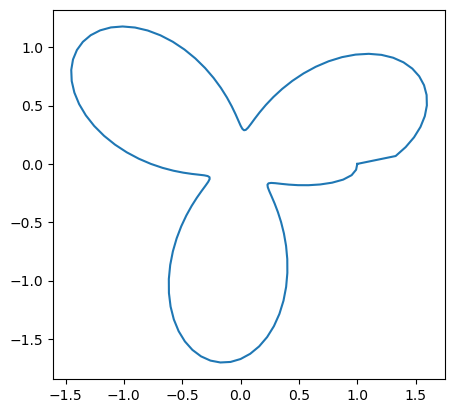

In [ ]:
%matplotlib inline
#Prueba para mirar instantes concretos de la solución.

ti = 10

plt.plot((1 + u[ti, :])*np.cos(theta), (1 + u[ti, :])*np.sin(theta))
plt.axis("scaled")
plt.show()

### Animation of standing waves (fundamnentals vibrations)

In [177]:
L/dx

100.0

In [178]:
# Define parameters
L = 1 # Length of the string
c = 1 # Wave speed
T = 120 # Duration of the simulation
dx = 0.01 # Spatial step size
dt = 0.005 # Temporal step size
N = int(L/dx) # Number of spatial points
M = int(T/dt) # Number of temporal points

# Create a 2D array to store the solution
u = np.zeros((M,N))

# Set the initial condition
theta = np.linspace(0, 2*np.pi, N)


In [181]:
theta

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

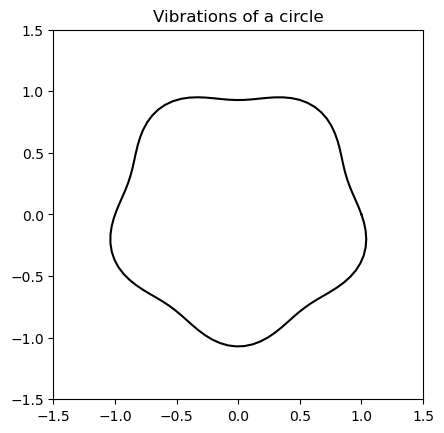

In [186]:
#Animaciones al por mayor.

fig, ax = plt.subplots()
line, = ax.plot([],[], "k")
#nodes, = ax.scatter([], [], color = "r")

ax.set_ylim(-L*1.5, L*1.5)
ax.set_xlim(-L*1.5, L*1.5)
#ax.set_xlabel('x')
#ax.set_ylabel('u')
ax.set_title('Vibrations of a circle')



K = [1, 2, 3, 4 ,5]
f = 5
A = 0.2

t = np.arange(0, 40, 1/60)
theta = np.linspace(0, 2*np.pi, N)

for kk in K:
    for tao in range(len(t)):
        u[tao, :] = A*np.sin(kk*theta)*np.sin(f*t[tao])
    
    node_angles = np.array([np.pi * i / k  for i in range(2*kk)])
    
    #ax.scatter(np.cos(node_angles), np.sin(node_angles))
    
    # Define the animation function
    def animate(m):
        k = 2 #Speed factor
        i = k*m
        e = 1/2
        
        #nodes.set_xdata(np.cos(node_angles))
        #nodes.set_ydata(np.sin(node_angles))
        
        if i < u.shape[0]:
            line.set_xdata((1 + e*u[i, :])*np.cos(theta))
            line.set_ydata((1 + e*u[i, :])*np.sin(theta))

        return line, nodes

    # Create and save the animation
    
    plt.axis("scaled")
    ani = animation.FuncAnimation(fig, animate, interval=20, blit=True)
    ani.save('results//wave_mode_{}.gif'.format(kk))
